In [1]:
import pandas as pd
import numpy as np
import openml

In [2]:
dataset = openml.datasets.get_dataset("4134")
bioresponse, bioresponse_labels, _, _ = dataset.get_data(target=dataset.default_target_attribute)


In [3]:
np.unique(bioresponse_labels)

array(['0', '1'], dtype=object)

In [4]:
# no missing values
bioresponse.isnull().sum().sum()

np.int64(0)

In [5]:
bioresponse.shape

(3751, 1776)

In [6]:
# remove columns with constant values
bioresponse = bioresponse.loc[:, (bioresponse != bioresponse.iloc[0]).any()]
bioresponse.shape

(3751, 1776)

In [7]:
print(bioresponse.min().min(), bioresponse.max().max())
np.sort(bioresponse.max())[-10:]

0.0 1.0


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

C:\Users\agata\AppData\Local\Temp\ipykernel_34844\197998380.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bioresponse.iloc[:, :5], labels=[f"Feature {i}" for i in range(1, 6)])


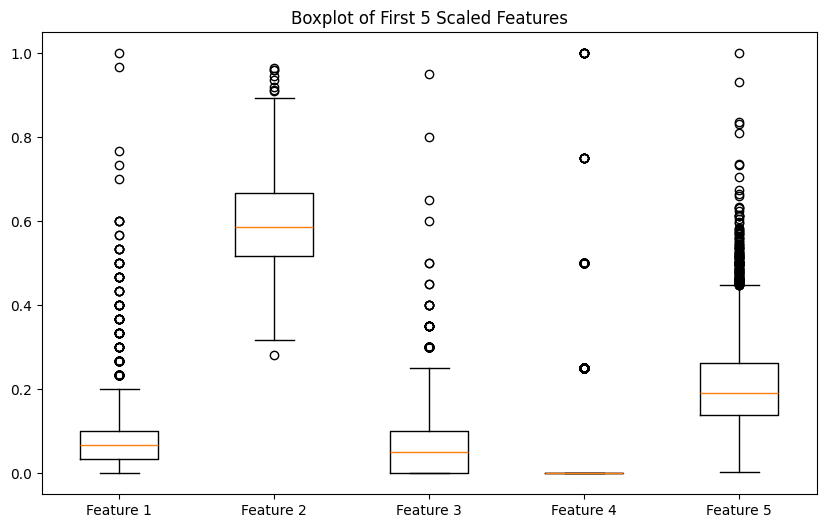


Training Label Distribution:
 target
1    2034
0    1717
Name: count, dtype: int64


In [8]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(bioresponse.iloc[:, :5], labels=[f"Feature {i}" for i in range(1, 6)])
plt.title("Boxplot of First 5 Scaled Features")
plt.show()

# Label Distribution
train_label_counts = bioresponse_labels.value_counts()
print("\nTraining Label Distribution:\n", train_label_counts)

In [9]:
def remove_highly_correlated_features(df, threshold=0.7):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    
    print(f"Removing {len(to_drop)} highly correlated features.")
    return df.drop(columns=to_drop)

In [10]:
# remove features with VIF > 10
bioresponse = remove_highly_correlated_features(bioresponse)

Removing 699 highly correlated features.


In [11]:
# check number of features left
print(f"Number of features left: {bioresponse.shape[1]}")

Number of features left: 1077


In [12]:
bioresponse_cleaned = bioresponse.copy()

In [13]:
# create dummy variables
n_obs, n_features = bioresponse_cleaned.shape
min_features = n_obs // 2

i = 0
new_columns = {}
while bioresponse_cleaned.shape[1] + len(new_columns) < min_features:
    col_to_copy = np.random.choice(bioresponse_cleaned.columns)
    new_columns[f"{col_to_copy}_perm_{i}"] = np.random.permutation(bioresponse_cleaned[col_to_copy].values)
    i += 1

df = pd.concat([bioresponse_cleaned, pd.DataFrame(new_columns)], axis=1)

df.shape


(3751, 1875)

In [14]:
# change labels to -1 and 1
bioresponse_labels = bioresponse_labels.map({'1': 1, '0': 0})
bioresponse_labels.rename('label', inplace=True)

0       1
1       1
2       1
3       1
4       0
       ..
3746    1
3747    1
3748    0
3749    1
3750    0
Name: label, Length: 3751, dtype: category
Categories (2, int64): [0 < 1]

In [15]:
df = pd.concat([df, bioresponse_labels], axis=1)

df.shape

(3751, 1876)

In [20]:
df.head(3)

,D1,D2,D3,D4,D5,D6,D8,D11,D12,D13,...,D1407_perm_789,D247_perm_790,D730_perm_791,D785_perm_792,D1033_perm_793,D489_perm_794,D1145_perm_795,D976_perm_796,D14_perm_797,label
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.585445,0.187856,0.0000,0.000000,...,0,0.0,0.0,0.0,1,0.0,0,1,0.211894,1
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.411754,0.101382,0.1875,0.193548,...,0,0.0,0.0,0.0,0,0.0,0,0,0.122987,1
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.517720,0.193548,0.1250,0.000000,...,0,0.0,0.0,0.0,0,0.0,1,1,0.107734,1


In [17]:
df.to_csv('data/preprocessed_bioresponse.csv', index=False, header = False)